# Created by Esmira Abdullaieva & Shovak Myroslav

In [40]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
import tensorflow as tf

### Implementation of KNN using SciKit-Learn

In [41]:
df = pd.read_csv('Mobile_Price.csv')
pd.set_option('display.max_columns', None)
print(df.head())

   battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0            842     0          2.2         0   1       0           7    0.6   
1           1021     1          0.5         1   0       1          53    0.7   
2            563     1          0.5         1   2       1          41    0.9   
3            615     1          2.5         0   0       0          10    0.8   
4           1821     1          1.2         0  13       1          44    0.6   

   mobile_wt  n_cores  pc  px_height  px_width   ram  sc_h  sc_w  talk_time  \
0        188        2   2         20       756  2549     9     7         19   
1        136        3   6        905      1988  2631    17     3          7   
2        145        5   6       1263      1716  2603    11     2          9   
3        131        6   9       1216      1786  2769    16     8         11   
4        141        2  14       1208      1212  1411     8     2         15   

   three_g  touch_screen  wifi  price_range 

In [42]:
print('The number of duplicates:', df.duplicated().sum())
print(f'Empty cells:\n{df.isnull().sum()}')

The number of duplicates: 0
Empty cells:
battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64


In [43]:
y = df['price_range']
X = df.drop(['price_range'], axis=1)

In [44]:
# separation of data into test and training
SEED = 42
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=SEED)

In [45]:
# creating KNN model and it's initialization
knn = KNeighborsClassifier(n_neighbors=17)
knn.fit(X_train.values, y_train.values)
model = knn.score(X_test.values, y_test.values)
print('R2 accuracy:', model)

R2 accuracy: 0.9409937888198758


In [46]:
# predict price for all test rows
price_predict = knn.predict(X_test.values)
print(f'Predict price:\n{price_predict}')

Predict price:
[1 3 3 3 0 3 2 3 3 0 3 3 3 1 2 3 3 3 1 3 0 1 2 1 1 1 1 1 2 2 0 1 0 0 3 3 0
 3 0 1 0 3 1 1 2 3 0 0 1 2 2 2 1 2 0 2 2 2 0 3 0 1 3 0 1 0 3 1 3 2 3 1 0 3
 0 3 2 1 1 3 0 3 0 3 0 3 1 3 0 3 3 1 0 0 3 1 2 2 2 3 3 0 0 1 0 0 3 1 3 1 1
 1 3 0 0 2 3 0 1 1 0 2 0 2 2 1 2 1 2 2 2 0 0 0 3 3 0 2 3 3 1 2 3 3 1 2 0 2
 1 2 0 2 1 3 1 2 0 2 3 2 2 3 1 3 2 1 3 0 2 3 3 1 1 1 1 3 3 3 3 1 2 0 2 0 3
 3 3 3 0 3 3 1 0 3 3 2 0 2 0 0 2 0 3 1 1 1 1 2 3 1 3 2 0 0 2 0 0 2 0 2 1 1
 1 3 3 2 2 2 2 2 2 0 0 0 3 2 1 3 1 3 1 2 0 3 1 3 3 0 3 2 3 2 3 1 0 2 1 1 0
 2 2 0 1 0 1 2 3 0 1 2 0 1 3 0 3 1 1 3 2 0 3 0 3 1 0 2 0 3 1 0 2 0 3 1 2 0
 3 0 3 0 3 1 0 0 0 3 1 2 2 1 0 0 2 2 1 3 2 3 2 1 1 3]


In [47]:
# calculating of metrix
mae = mean_absolute_error(y_test, price_predict)
mse = mean_squared_error(y_test, price_predict)
rmse = mean_squared_error(y_test, price_predict, squared=False)
relative_error = round(rmse/price_predict.mean()*100, 2)

print(f'{mse = }\n{rmse = }\n{relative_error = }%')

mse = 0.059006211180124224
rmse = 0.24291194120529402
relative_error = 15.61%


In [48]:
error_rate = []
for i in range(1, 50):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

print('The best number of neighbors:', error_rate.index(min(error_rate)) + 1)

The best number of neighbors: 17


Text(0, 0.5, 'Error Rate')

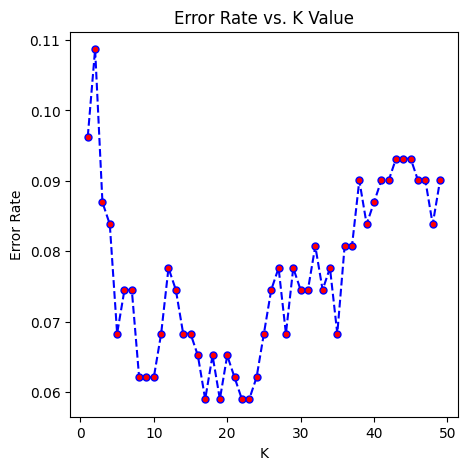

In [49]:
plt.figure(figsize=(5, 5))
plt.plot(range(1, 50), error_rate, color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=5)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

### MLP implementation using TensorFlow

In [50]:
# price range preparation for encode
def label_encode(label):
    val = []
    if label == 0:
        val = [1, 0, 0, 0]
    elif label == 1:
        val = [0, 1, 0, 0]
    elif label == 2:
        val = [0, 0, 1, 0]
    elif label == 3:
        val = [0, 0, 0, 1]
    return val

In [51]:
# data values preparation for encode
def data_encode(x_value, y_value):
    X = []
    Y = []
    for i in range(len(x_value)):
        line = x_value.iloc[i].tolist()
        X.append([line[0], line[1], line[2], line[3], line[4], line[5], line[6], line[7], line[8], line[9], line[10],
                 line[11], line[12], line[13], line[14], line[15], line[16], line[17], line[18], line[19]])
    for i in y_value:
        Y.append(label_encode(i))
    return X, Y


In [52]:
# defining a Multilayer Perceptron Model
def model(x, weights, bias):
    layer_1 = tf.add(tf.matmul(x, weights["hidden"]), bias["hidden"])
    layer_1 = tf.nn.relu(layer_1)

    output_layer = tf.matmul(layer_1, weights["output"]) + bias["output"]
    return output_layer

In [53]:
# training and test Data
train_X, train_Y = data_encode(X_train, y_train)
test_X, test_Y = data_encode(X_test, y_test)

In [54]:
# hyperparameter
learning_rate = 0.01
training_epochs = 2000
display_steps = 50

In [55]:
# network parameters
n_input = 20 # the number of characteristics 
n_hidden = 30 
n_output = 4  # the number of predict price [0, 1, 2, 3]

In [56]:
# graph nodes
tf.compat.v1.disable_eager_execution()
X = tf.compat.v1.placeholder(tf.float32, [None, n_input])
Y = tf.compat.v1.placeholder(tf.float32, [None, n_output])

In [57]:
# weights 
weights = {
    "hidden": tf.Variable(tf.random.normal([n_input, n_hidden]), name="weight_hidden"),
    "output": tf.Variable(tf.random.normal([n_hidden, n_output]), name="weight_output")
}


In [58]:
# biases
bias = {
    "hidden": tf.Variable(tf.random.normal([n_hidden]), name="bias_hidden"),
    "output": tf.Variable(tf.random.normal([n_output]), name="bias_output")
}

In [59]:
# define model
pred = model(X, weights, bias)

In [60]:
# define loss and optimizer
cost = tf.compat.v1.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=pred, labels=Y))
optimizer = tf.compat.v1.train.AdamOptimizer(learning_rate).minimize(cost)

In [61]:
# initializing global variables
init = tf.compat.v1.global_variables_initializer()

In [64]:
with tf.compat.v1.Session() as sess:
    sess.run(init)
    for epoch in range(training_epochs):
        _, c = sess.run([optimizer, cost], feed_dict={X: train_X, Y: train_Y})
        if (epoch + 1) % display_steps == 0:
            print("Epoch:", (epoch + 1), "Cost:", c)

    print("Optimization Finished!")

    test_result = sess.run(pred, feed_dict={X: test_X})
    correct_pred = tf.compat.v1.equal(tf.argmax(test_result, 1), tf.argmax(test_Y, 1))

    accuracy = tf.compat.v1.reduce_mean(tf.cast(correct_pred, "float"))
    print("Accuracy:", accuracy.eval({X: test_X, Y: train_Y}))

Epoch: 50 Cost: 407.1183
Epoch: 100 Cost: 116.1296
Epoch: 150 Cost: 64.17187
Epoch: 200 Cost: 61.627205
Epoch: 250 Cost: 27.919004
Epoch: 300 Cost: 31.829453
Epoch: 350 Cost: 20.766243
Epoch: 400 Cost: 20.41865
Epoch: 450 Cost: 18.721983
Epoch: 500 Cost: 22.9511
Epoch: 550 Cost: 15.500535
Epoch: 600 Cost: 14.604471
Epoch: 650 Cost: 16.300209
Epoch: 700 Cost: 25.431807
Epoch: 750 Cost: 11.944039
Epoch: 800 Cost: 10.351401
Epoch: 850 Cost: 10.108234
Epoch: 900 Cost: 10.000792
Epoch: 950 Cost: 10.766806
Epoch: 1000 Cost: 10.31076
Epoch: 1050 Cost: 23.203743
Epoch: 1100 Cost: 25.41894
Epoch: 1150 Cost: 8.120496
Epoch: 1200 Cost: 9.347304
Epoch: 1250 Cost: 64.3575
Epoch: 1300 Cost: 13.081195
Epoch: 1350 Cost: 20.444199
Epoch: 1400 Cost: 9.164396
Epoch: 1450 Cost: 12.741729
Epoch: 1500 Cost: 7.1003947
Epoch: 1550 Cost: 9.5407
Epoch: 1600 Cost: 9.425868
Epoch: 1650 Cost: 25.030624
Epoch: 1700 Cost: 9.195365
Epoch: 1750 Cost: 9.484572
Epoch: 1800 Cost: 7.4344816
Epoch: 1850 Cost: 10.74232
Epoc